In [1]:
import sys
import numpy as np
import torch
from torch import Tensor, ones, stack, load
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
# import pandas as pd
from torch.nn import Module
from torch.utils.data import DataLoader
# from scipy import stats
# from pathlib import Path
import wandb
import time
from utilities import *
from tesladatano import TeslaDatasetNoStb
from mlp import MLP

In [14]:
nvcc --version

NameError: name 'nvcc' is not defined

In [2]:
# Use cuda if it is available, else use the cpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
normalize = 1000 
    
ds = TeslaDatasetNoStb(device = device, data ="train", normalize = normalize, rel_time = True, diff = "fwd_diff")
ds_test = TeslaDatasetNoStb(device = device, ID = -1, data = "test",normalize = normalize, rel_time = True, diff = "fwd_diff")

model1 = MLP(input_size=6,
                      output_size=1, 
                      hidden_size=100, 
                      num_hidden=4, 
                      lb=ds.lb, 
                      ub=ds.ub,
                      activation = torch.relu
                      )

# model2 = MLP(input_size=6,
#                       output_size=1, 
#                       hidden_size=100, 
#                       num_hidden=4, 
#                       lb=ds.lb, 
#                       ub=ds.ub,
#                       activation = torch.relu
#                       )

model2 = MLP(input_size=6,
                      output_size=1, 
                      hidden_size=50, 
                      num_hidden=8, 
                      lb=ds.lb, 
                      ub=ds.ub,
                      activation = torch.relu
                      )

model3 = MLP(input_size=6,
                      output_size=1, 
                      hidden_size=100, 
                      num_hidden=8, 
                      lb=ds.lb, 
                      ub=ds.ub,
                      activation = torch.relu
                      )

model1.to(device)
model2.to(device)
model3.to(device)

(445266, 10)
(445266, 10)


In [4]:
#Import the best model
#PATH = '/nostb/best_model_stb_{}_{}.pt'.format(wandb.run.id, wandb.run.name)

#### non-regularised model ######
#PATH = 'nomodel/best_model_78stwyuk_NO_reg-alpha.pt' # alpha = 0
PATH = 'nomodel/best_model_7l3tau84_NO_reg-alpha.pt'
model1.load_state_dict(torch.load(PATH))
model1.eval()

##### regularised model with alpha=1 #######
#PATH2 = 'nomodel/best_model_6kt7blyu_NO_reg-alpha=1-architecture.pt' 
PATH2 = 'nomodel/best_model_eochtnvj_NO_reg-alpha.pt'
PATH2 = 'nomodel/best_model_wqxbyx74_NO_reg-alpha.pt'
model2.load_state_dict(torch.load(PATH2))
model2.eval()

########## time stability model ###############
#PATH3 = 'nostb/best_model_stb_gngwwgbv_NO_run_t-stb.pt'
PATH3 = 'nostb/best_model_stb_221m0axe_NO_run_t-stb.pt'
model3.load_state_dict(torch.load(PATH3))
model3.eval()

MLP(
  (linear_layers): ModuleList(
    (0): Linear(in_features=6, out_features=100, bias=True)
    (1): Linear(in_features=100, out_features=100, bias=True)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): Linear(in_features=100, out_features=100, bias=True)
    (4): Linear(in_features=100, out_features=100, bias=True)
    (5): Linear(in_features=100, out_features=100, bias=True)
    (6): Linear(in_features=100, out_features=100, bias=True)
    (7): Linear(in_features=100, out_features=100, bias=True)
    (8): Linear(in_features=100, out_features=100, bias=True)
    (9): Linear(in_features=100, out_features=1, bias=True)
  )
)

(4901, 10)
Test data ID= 16
MAE1: 0.3636791194492868
MSE1: 0.20008267031115146
Relative error1 (%): 9.637337654426066
MAE2: 0.38755283987536726
MSE2: 0.20269520411681488
Relative error2 (%): 9.700052266454927
MAE3: 0.2551080299037094
MSE3: 0.10240381547790908
Relative error3 (%): 6.894621145166573


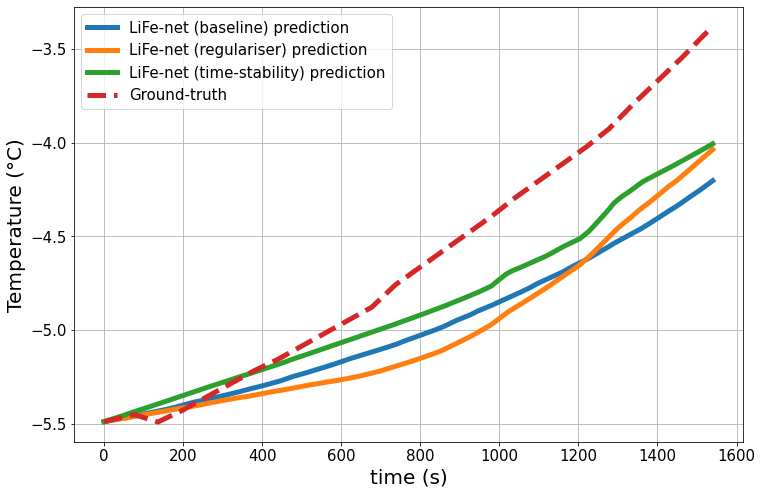

(11259, 10)
Test data ID= 39
MAE1: 0.5879023405534627
MSE1: 0.41302600791237576
Relative error1 (%): 2.800490599501364
MAE2: 0.20622286698287823
MSE2: 0.05947060188779152
Relative error2 (%): 1.062665512484383
MAE3: 0.22518741855743343
MSE3: 0.07311327051773989
Relative error3 (%): 1.1782664859630283


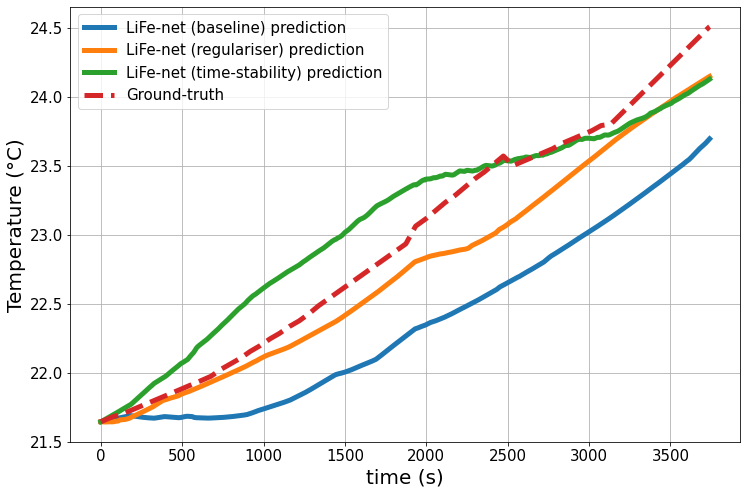

(2440, 10)
Test data ID= 47
MAE1: 0.0481865314111248
MSE1: 0.004468823675127186
Relative error1 (%): 0.21141229696938937
MAE2: 0.3043926386093878
MSE2: 0.12747390789626942
Relative error2 (%): 1.12913088083296
MAE3: 0.14128428702475693
MSE3: 0.03134308142762762
Relative error3 (%): 0.5598922817554467


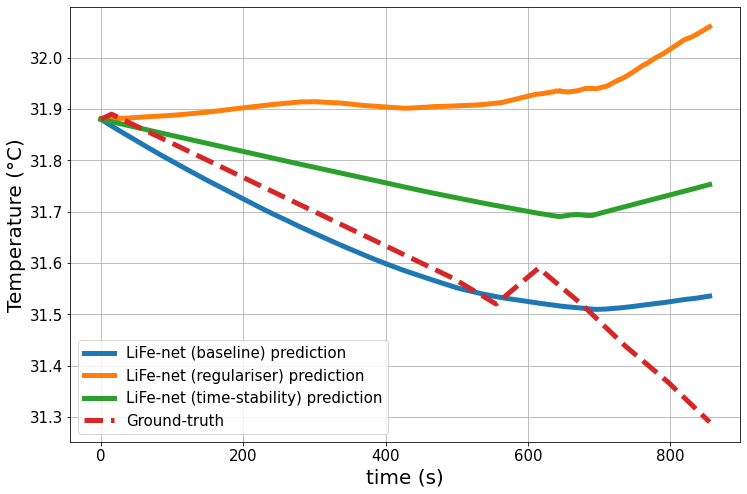

(12741, 10)
Test data ID= 52
MAE1: 0.7244962713822856
MSE1: 0.5735554531175414
Relative error1 (%): 3.6466528995852907
MAE2: 0.36168517383605986
MSE2: 0.17165195865576502
Relative error2 (%): 1.994945808259736
MAE3: 0.6035420981844547
MSE3: 0.4081370688840453
Relative error3 (%): 3.07616581569518


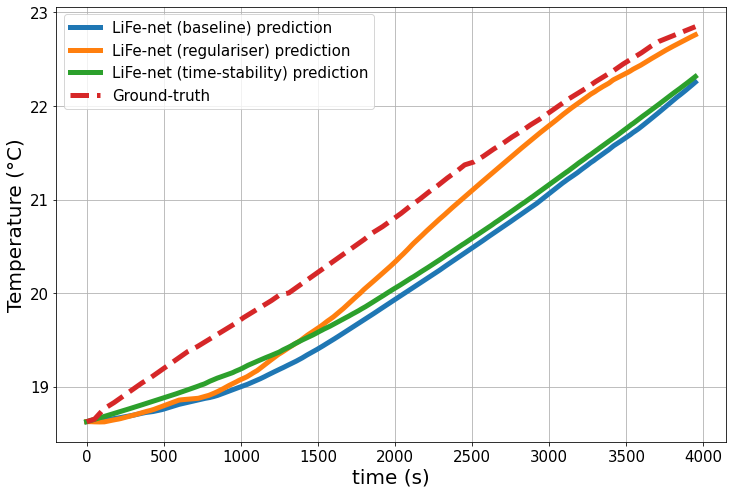

(20002, 10)
Test data ID= 72
MAE1: 1.2956543243408203
MSE1: 2.2991299544740045
Relative error1 (%): 8.823158465223905
MAE2: 0.43713970646858213
MSE2: 0.29811902400094265
Relative error2 (%): 3.1771459436065026
MAE3: 0.425021318769455
MSE3: 0.35294247860006267
Relative error3 (%): 3.4569594479756707


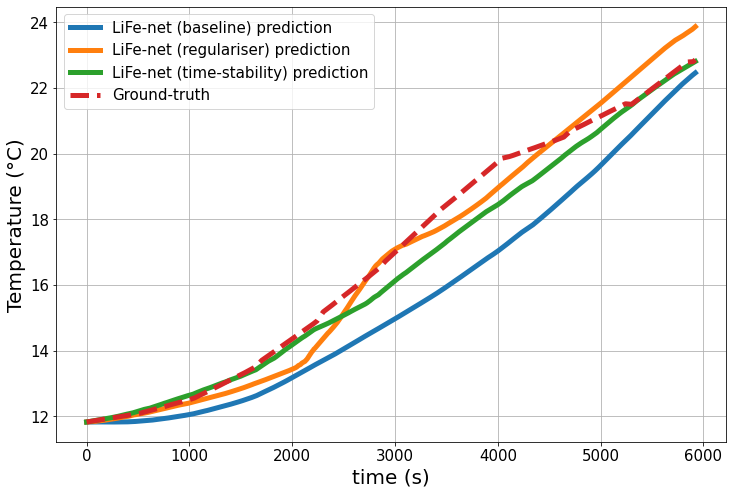

(18267, 10)
Test data ID= 81
MAE1: 0.5945965579555477
MSE1: 0.6214352820102269
Relative error1 (%): 2.7434350402386
MAE2: 0.8160535831802308
MSE2: 1.0436901850669213
Relative error2 (%): 3.555351368260922
MAE3: 0.7134658275233305
MSE3: 0.7494843600971656
Relative error3 (%): 3.012853504551312


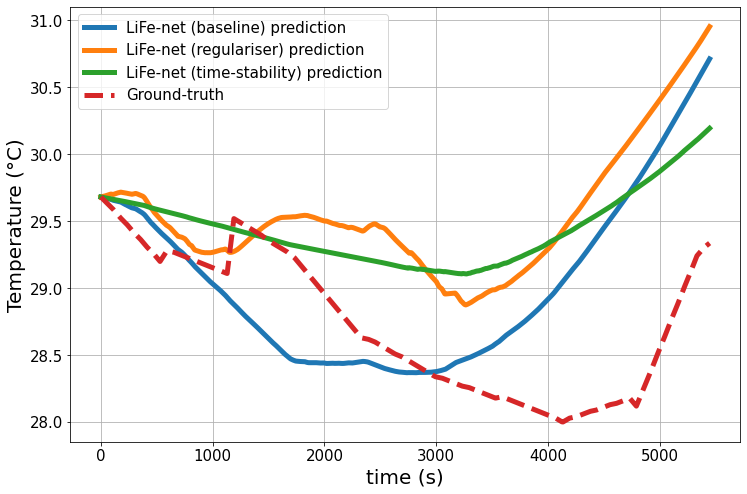

(19418, 10)
Test data ID= 88
MAE1: 1.333428619253509
MSE1: 2.4278756499977505
Relative error1 (%): 4.654084046505518
MAE2: 1.298290368714121
MSE2: 2.515276174536849
Relative error2 (%): 4.737114047241846
MAE3: 0.3276916058655194
MSE3: 0.16723639517188954
Relative error3 (%): 1.2214801138542015


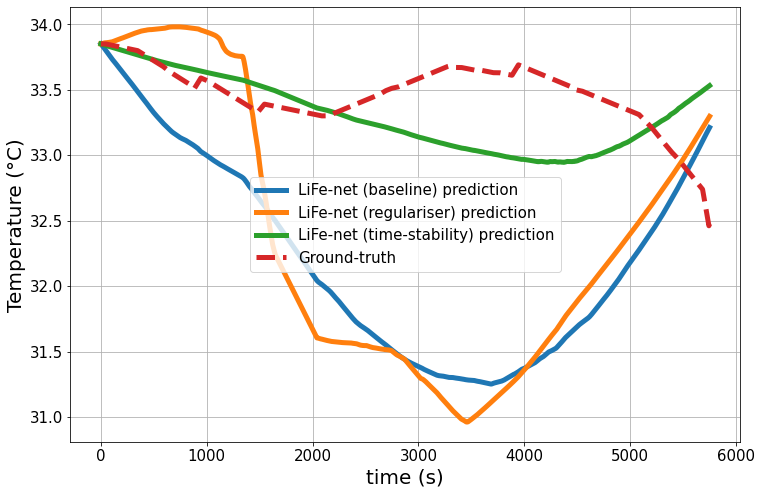

In [5]:
#evaluate(model,idd,rel_time,diff,normalize)
rl=True
diff = "fwd_diff"

#mae_arr1, mse_arr1, rel_arr1, mae_arr2, mse_arr2, rel_arr2, mae_arr3, mse_arr3, rel_arr3

mae16_1,mse16_1,rel_err16_1,mae16_2,mse16_2,rel_err16_2,mae16_3,mse16_3,rel_err16_3,pred_tempv1_16_1,pred_tempv1_16_2,pred_tempv1_16_3,pred_temp16_1,pred_temp16_2,pred_temp16_3,true_temp16_1,t16 = evaluate(model1,model2,model3,idd=16,rel_time=rl,diff=diff,normalize=normalize, device = device )
mae39_1,mse39_1,rel_err39_1,mae39_2,mse39_2,rel_err39_2,mae39_3,mse39_3,rel_err39_3,pred_tempv1_39_1,pred_tempv1_39_2,pred_tempv1_39_3,pred_temp39_1,pred_temp39_2,pred_temp39_3,true_temp39_1,t39 = evaluate(model1,model2,model3,idd=39,rel_time=rl,diff=diff,normalize=normalize, device = device)
mae47_1,mse47_1,rel_err47_1,mae47_2,mse47_2,rel_err47_2,mae47_3,mse47_3,rel_err47_3,pred_tempv1_47_1,pred_tempv1_47_2,pred_tempv1_47_3,pred_temp47_1,pred_temp47_2,pred_temp47_3,true_temp47_1,t47 = evaluate(model1,model2,model3,idd=47,rel_time=rl,diff=diff,normalize=normalize, device = device)
mae52_1,mse52_1,rel_err52_1,mae52_2,mse52_2,rel_err52_2,mae52_3,mse52_3,rel_err52_3,pred_tempv1_52_1,pred_tempv1_52_2,pred_tempv1_52_3,pred_temp52_1,pred_temp52_2,pred_temp52_3,true_temp52_1,t52 = evaluate(model1,model2,model3,idd=52,rel_time=rl,diff=diff,normalize=normalize, device = device)
mae72_1,mse72_1,rel_err72_1,mae72_2,mse72_2,rel_err72_2,mae72_3,mse72_3,rel_err72_3,pred_tempv1_72_1,pred_tempv1_72_2,pred_tempv1_72_3,pred_temp72_1,pred_temp72_2,pred_temp72_3,true_temp72_1,t72 = evaluate(model1,model2,model3,idd=72,rel_time=rl,diff=diff,normalize=normalize, device = device)
mae81_1,mse81_1,rel_err81_1,mae81_2,mse81_2,rel_err81_2,mae81_3,mse81_3,rel_err81_3,pred_tempv1_81_1,pred_tempv1_81_2,pred_tempv1_81_3,pred_temp81_1,pred_temp81_2,pred_temp81_3,true_temp81_1,t81 = evaluate(model1,model2,model3,idd=81,rel_time=rl,diff=diff,normalize=normalize, device = device)
mae88_1,mse88_1,rel_err88_1,mae88_2,mse88_2,rel_err88_2,mae88_3,mse88_3,rel_err88_3,pred_tempv1_88_1,pred_tempv1_88_2,pred_tempv1_88_3,pred_temp88_1,pred_temp88_2,pred_temp88_3,true_temp88_1,t88 = evaluate(model1,model2,model3,idd=88,rel_time=rl,diff=diff,normalize=normalize, device = device)

In [6]:

# Test values = [16,39,47,52,72,81,88]
mae_avg_1 = (mae16_1+mae39_1+mae47_1+mae52_1+mae72_1+mae81_1+mae88_1)/7
mse_avg_1 = (mse16_1+mse39_1+mse47_1+mse52_1+mse72_1+mse81_1+mse88_1)/7
rel_err_avg_1 = (rel_err16_1+rel_err39_1+rel_err47_1+rel_err52_1+rel_err72_1+rel_err81_1+rel_err88_1)/7

# Test values = [16,39,47,52,72,81,88]
mae_avg_2 = (mae16_2+mae39_2+mae47_2+mae52_2+mae72_2+mae81_2+mae88_2)/7
mse_avg_2 = (mse16_2+mse39_2+mse47_2+mse52_2+mse72_2+mse81_2+mse88_2)/7
rel_err_avg_2 = (rel_err16_2+rel_err39_2+rel_err47_2+rel_err52_2+rel_err72_2+rel_err81_2+rel_err88_2)/7


# Test values = [16,39,47,52,72,81,88]
mae_avg_3 = (mae16_3+mae39_3+mae47_3+mae52_3+mae72_3+mae81_3+mae88_3)/7
mse_avg_3 = (mse16_3+mse39_3+mse47_3+mse52_3+mse72_3+mse81_3+mse88_3)/7
rel_err_avg_3 = (rel_err16_3+rel_err39_3+rel_err47_3+rel_err52_3+rel_err72_3+rel_err81_3+rel_err88_3)/7

# Prediction accuracy of baseline, regularised and time-stability models

In [7]:
print('MAE for baseline model:', mae_avg_1[2])
print('MSE for baseline model:', mse_avg_1[2])
print('Relative error for baseline model:', rel_err_avg_1[2])

MAE for baseline model: 0.7068491091922909
MSE for baseline model: 0.9342248344997396
Relative error for baseline model: 4.645224428921447


In [8]:
print('MAE for regularised model:', mae_avg_2[2])
print('MSE for regularised model:', mse_avg_2[2])
print('Relative error for regularised model:', rel_err_avg_2[2])

MAE for regularised model: 0.544476739666661
MSE for regularised model: 0.6311967223087649
Relative error for regularised model: 3.622343689591611


In [9]:
print('MAE for time stability model:', mae_avg_3[2])
print('MSE for time stability model:', mse_avg_3[2])
print('Relative error for time stability model:', rel_err_avg_3[2])

MAE for time stability model: 0.38447151226123705
MSE for time stability model: 0.2692372100252057
Relative error for time stability model: 2.771462684994488


# Analysis of Charging Power vs Temperature Evolution



In [10]:
cs = []
for Ti in pred_tempv1_16_3:
    cs_i,ct_i = get_prediction_regression(20, Ti, 80)
    cs.append(cs_i)
    
cs2 = []
for Ti in pred_tempv1_39_3:
    cs_i,ct_i = get_prediction_regression(20, Ti, 80)
    cs2.append(cs_i)

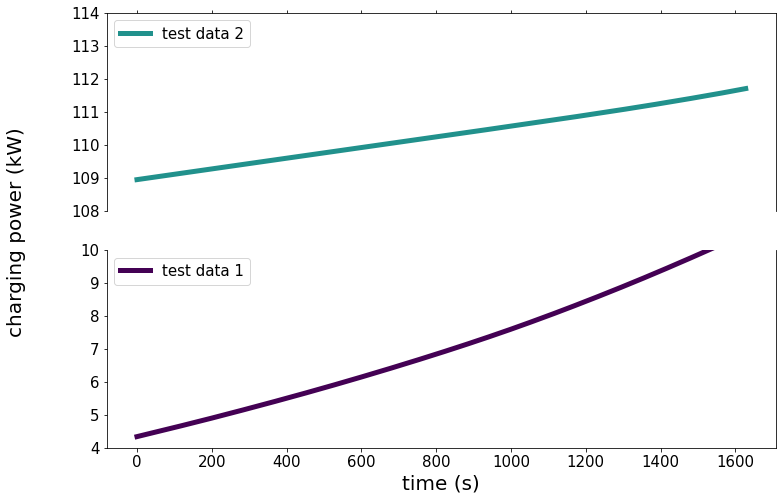

In [11]:
color2 = plt.cm.viridis(0)
color1 = plt.cm.viridis(0.5)


f, (ax, ax2) = plt.subplots(2, 1, sharex=True,figsize = (12, 8))


parameters = {'axes.labelsize': 35,
       'axes.titlesize': 35,
       'legend.title_fontsize': 15,
        'axes.labelsize':20,
        'legend.fontsize':15,
        'xtick.labelsize':15,
         'ytick.labelsize':15}
plt.rcParams.update(parameters)

# plot the same data on both axes
ax2.plot(t16, np.array(cs), color = color2, linewidth=5, label = 'test data 1'
        )
ax.plot(t39[0:4898], np.array(cs2[0:4898]), color = color1, linewidth=5, label = 'test data 2'
       )

# zoom-in / limit the view to different portions of the data
ax.set_ylim(108., 114.)  # outliers only
ax2.set_ylim(4., 10.)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
plt.xlabel('time (s)', fontsize = 20)
ax.legend(loc = 'upper left') 
ax2.legend(loc = 'upper left')
#f.set_ylabel('charging power (kW)')

f.text(0.01, 0.5, 'charging power (kW)', va='center', rotation='vertical', fontsize = 20)


plt.draw()
plt.show()